In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load your dataset
df = pd.read_csv(
    "../../0_DataPreparation/initialdata/merged_data_temperature+holidays+weather_impressions.csv"
)  #

# Ensure the 'Datum' column is in datetime format
df["Datum"] = pd.to_datetime(df["Datum"])

# Define time ranges
train_start = "2013-07-01"
train_end = "2017-07-31"
val_start = "2017-08-01"
val_end = "2018-07-31"
test_start = "2018-08-01"
test_end = "2019-07-30"

# Split data
train_data = df[(df["Datum"] >= train_start) & (df["Datum"] <= train_end)]
validation_data = df[(df["Datum"] >= val_start) & (df["Datum"] <= val_end)]
test_data = df[(df["Datum"] >= test_start) & (df["Datum"] <= test_end)]

# Optional: print shapes
print("Train shape:", train_data.shape)
print("Validation shape:", validation_data.shape)
print("Test shape:", test_data.shape)

Train shape: (7517, 15)
Validation shape: (1839, 15)
Test shape: (351, 15)


In [3]:
df.head()

,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression,Is_Holiday
0,2012-01-01,Sunday,8.0,9.82,14,58.0,NaN,NaN,NaN,NaN,6.504342,3.315658,Significantly warmer,okay,1
1,2012-01-02,Monday,7.0,7.44,12,0.0,NaN,NaN,NaN,NaN,3.062303,4.377697,Significantly warmer,very good,0
2,2012-01-03,Tuesday,8.0,5.54,18,63.0,NaN,NaN,NaN,NaN,3.062303,2.477697,Significantly warmer,okay,0
3,2012-01-04,Wednesday,4.0,5.69,19,80.0,NaN,NaN,NaN,NaN,3.062303,2.627697,Significantly warmer,very bad,0
4,2012-01-05,Thursday,6.0,5.30,23,80.0,NaN,NaN,NaN,NaN,3.062303,2.237697,Significantly warmer,very bad,0


In [26]:
columns = train_data.columns.tolist()
columns

['Datum',
 'Weekday',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Wettercode',
 'id',
 'Warengruppe',
 'Umsatz',
 'KielerWoche',
 'AverageTemp',
 'Temp_Deviation',
 'Temp_vs_Avg',
 'Weather_Impression',
 'Is_Holiday']

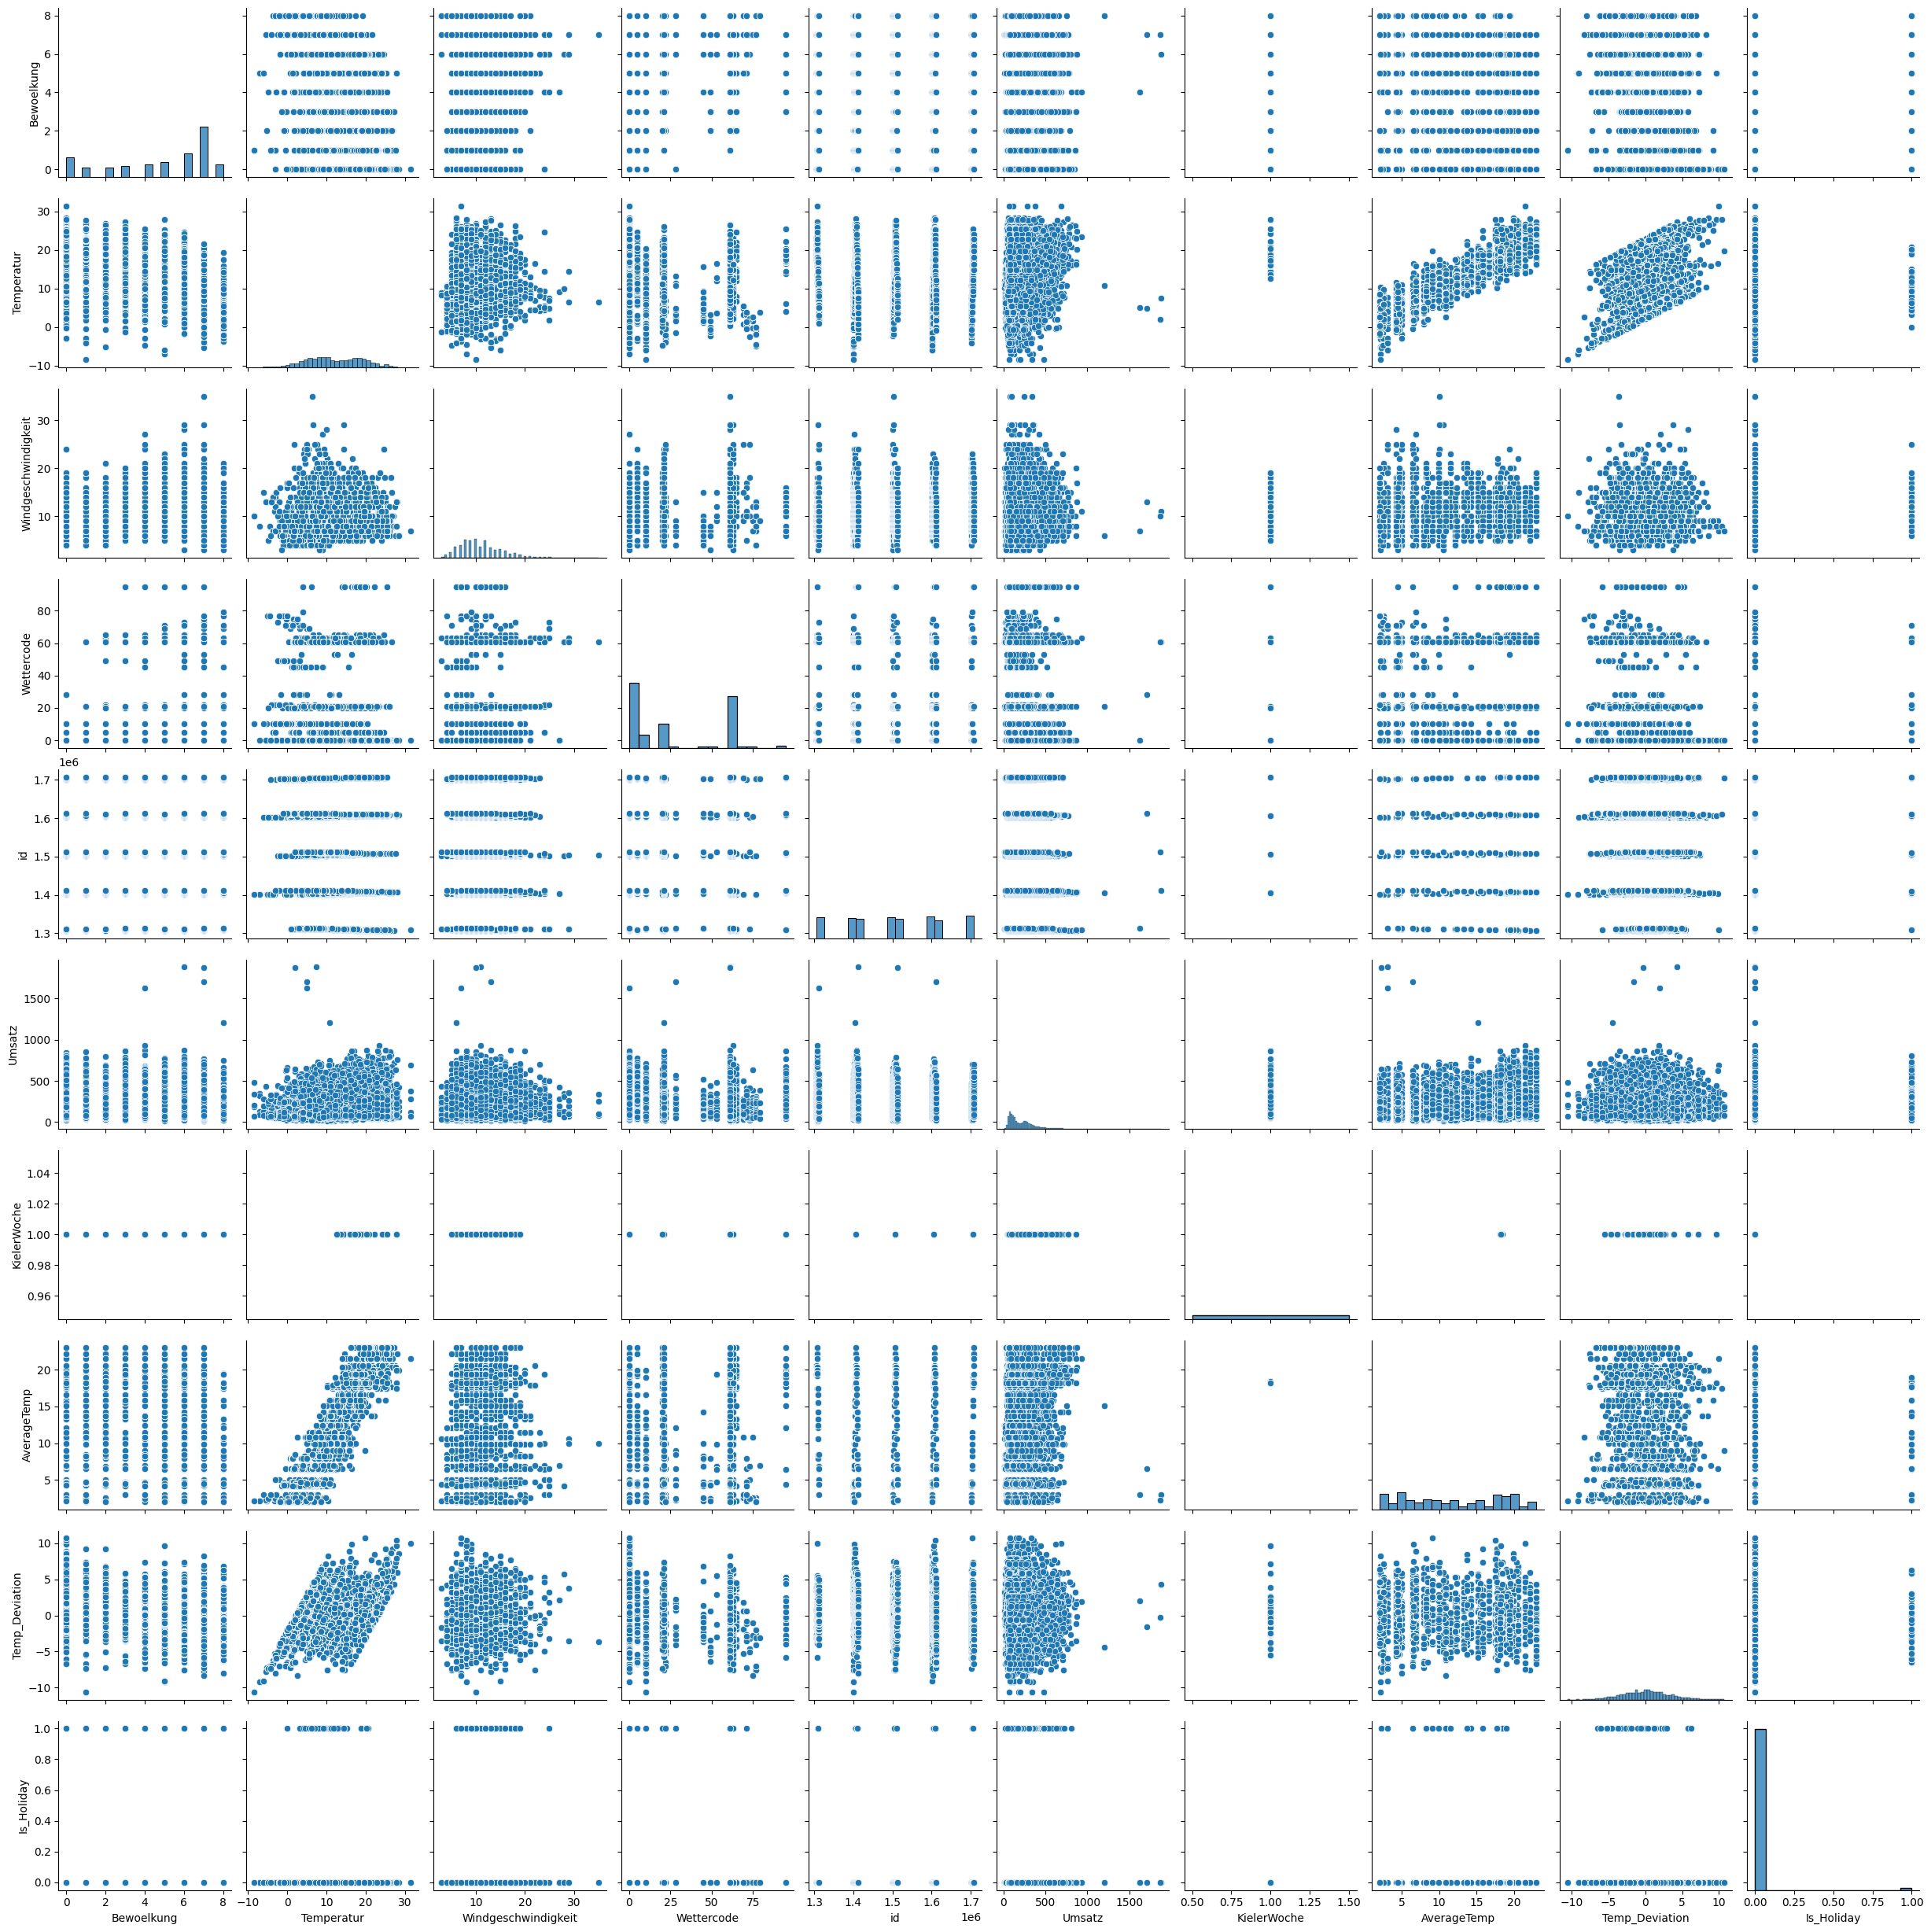

In [27]:
sns.pairplot(train_data[columns])

In [28]:
#remove all non-numeric columns for correlation
columns = [col for col in columns if train_data[col].dtype in ['float64', 'int64']]
train_data[columns].corr()

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Is_Holiday
Bewoelkung,1.000000,-0.376459,0.042912,0.549314,0.041113,-0.085921,NaN,-0.270596,-0.283291,-0.050103
Temperatur,-0.376459,1.000000,0.003471,-0.204801,-0.095729,0.216570,NaN,0.892810,0.398119,0.006644
Windgeschwindigkeit,0.042912,0.003471,1.000000,0.151729,0.027233,0.011454,NaN,0.014588,-0.022016,0.025854
Wettercode,0.549314,-0.204801,0.151729,1.000000,0.041823,-0.046785,NaN,-0.134065,-0.180885,-0.031755
id,0.041113,-0.095729,0.027233,0.041823,1.000000,-0.097429,NaN,-0.068435,-0.072883,0.022955
Umsatz,-0.085921,0.216570,0.011454,-0.046785,-0.097429,1.000000,NaN,0.235087,0.001433,0.047747
KielerWoche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageTemp,-0.270596,0.892810,0.014588,-0.134065,-0.068435,0.235087,NaN,1.000000,-0.057753,0.022092
Temp_Deviation,-0.283291,0.398119,-0.022016,-0.180885,-0.072883,0.001433,NaN,-0.057753,1.000000,-0.030266
Is_Holiday,-0.050103,0.006644,0.025854,-0.031755,0.022955,0.047747,NaN,0.022092,-0.030266,1.000000


Using Weekday as a second feature next to Warengruppe

In [29]:
import pandas as pd
import statsmodels.api as sm

# Define predictors columns
predictors = ["Warengruppe", "Weekday"]  

Y = train_data['Umsatz']

# Create dummy variables for each categorical predictor and concatenate them
X = pd.get_dummies(train_data[["Warengruppe", "Weekday"]], drop_first=True, dtype=int)
X = sm.add_constant(X)

# Drop rows where either X or Y has NaN
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit the model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        18:56:03   Log-Likelihood:                -43794.
No. Observations:                7487   AIC:                         8.761e+04
Df Residuals:                    7475   BIC:                         8.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    111

In [30]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")

# Ensure the 'Datum' column is in datetime format and extract the weekday
test_data['Datum'] = pd.to_datetime(test_data['Datum'])
test_data['Weekday'] = test_data['Datum'].dt.day_name()

# Replace Warengruppe numbers with product names (same as in training data)
warengruppe_mapping = {
    1: 'Brot',
    2: 'Brötchen', 
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(warengruppe_mapping)

# Create dummy variables for the test data
X_test = pd.get_dummies(test_data[['Warengruppe', 'Weekday']], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)  # Für das Interzept

# Ensure that the test data has the same columns as the training data
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Ensure the order of columns matches the training data
X_test = X_test[X_clean.columns]

# predict with the model
preds = results.predict(X_test)

# create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission2.csv", index=False)
print("Submission file created: submission2.csv")




Submission file created: submission2.csv


Trying Warengruppe + Weekday/ non weekday

In [31]:
import pandas as pd
import statsmodels.api as sm

# Create a new column 'Is_Weekend' which is 1 if the day is Saturday or Sunday, else 0
train_data['Is_Weekend'] = train_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Define predictors: product group and weekend indicator
predictors = ['Warengruppe', 'Is_Weekend']

Y = train_data['Umsatz']

# Create dummy variables for the product group
X_warengruppe = pd.get_dummies(train_data['Warengruppe'], drop_first=True, dtype=int)

# 'Is_Weekend' is already numeric (0 or 1), so combine it with the product group dummies
X = pd.concat([X_warengruppe, train_data['Is_Weekend']], axis=1)
X = sm.add_constant(X)

# Drop rows with missing values in either X or Y
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit the OLS regression model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

# Print model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2607.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        18:56:03   Log-Likelihood:                -43800.
No. Observations:                7487   AIC:                         8.761e+04
Df Residuals:                    7480   BIC:                         8.766e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.3020      2.283     46.555      0.0

/tmp/ipykernel_1736/66975642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Is_Weekend'] = train_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)


In [32]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")

# Convert 'Datum' to datetime and extract the weekday name
test_data['Datum'] = pd.to_datetime(test_data['Datum'])
test_data['Weekday'] = test_data['Datum'].dt.day_name()

# Replace Warengruppe numbers with product names (same as in training data)
warengruppe_mapping = {
    1: 'Brot',
    2: 'Brötchen', 
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(warengruppe_mapping)

# Create 'Is_Weekend' flag (1 if Saturday or Sunday, else 0)
test_data['Is_Weekend'] = test_data['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Create dummy variables for 'Warengruppe' only (drop first category)
X_test_warengruppe = pd.get_dummies(test_data['Warengruppe'], drop_first=True, dtype=int)

# Combine with 'Is_Weekend' column
X_test = pd.concat([X_test_warengruppe, test_data['Is_Weekend']], axis=1)
X_test = sm.add_constant(X_test)

# Add missing columns (if any) that are in training data but not in test data, set to 0
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Reorder columns to match training data exactly
X_test = X_test[X_clean.columns]

# Predict Umsatz using the trained model
preds = results.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission4.csv", index=False)
print("Submission file created: submission4.csv")


Submission file created: submission4.csv


Trying Warengruppe + holidays

In [33]:
import pandas as pd
import statsmodels.api as sm

# Define predictors columns
predictors = ["Warengruppe", "Is_Holiday"]  

Y = train_data['Umsatz']

# Create dummy variables for each categorical predictor and concatenate them
X = pd.get_dummies(train_data[["Warengruppe", "Is_Holiday"]], drop_first=True, dtype=int)
X = sm.add_constant(X)

# Drop rows where either X or Y has NaN
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit the model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2340.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        18:56:03   Log-Likelihood:                -44070.
No. Observations:                7487   AIC:                         8.815e+04
Df Residuals:                    7480   BIC:                         8.820e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    120

In [34]:
import pandas as pd
import statsmodels.api as sm



# Load the test data
test_data = pd.read_csv("test.csv")

# Convert 'Datum' to datetime
test_data['Datum'] = pd.to_datetime(test_data['Datum'])

# Replace Warengruppe numbers with product names (same as in training data)
warengruppe_mapping = {
    1: 'Brot',
    2: 'Brötchen', 
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(warengruppe_mapping)

# Define holidays based on your training data
holidays = [
    # 2012
    '2012-01-01', '2012-04-06', '2012-04-09', '2012-05-01', '2012-05-17', '2012-05-28', '2012-10-03', '2012-12-25', '2012-12-26',
    # 2013
    '2013-01-01', '2013-03-29', '2013-04-01', '2013-05-01', '2013-05-09', '2013-05-20', '2013-10-03', '2013-12-25', '2013-12-26',
    # 2014
    '2014-01-01', '2014-04-18', '2014-04-21', '2014-05-01', '2014-05-29', '2014-06-09', '2014-10-03', '2014-12-25', '2014-12-26',
    # 2015
    '2015-01-01', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-10-03', '2015-12-25', '2015-12-26',
    # 2016
    '2016-01-01', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26',
    # 2017
    '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03', '2017-10-31', '2017-12-25', '2017-12-26',
    # 2018
    '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01', '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26',
    # 2019
    '2019-01-01', '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25', '2019-12-26'
]

# Convert to datetime objects for comparison
holidays = pd.to_datetime(holidays)

# Create 'Is_Holiday' flag (1 if holiday, else 0)
test_data['Is_Holiday'] = test_data['Datum'].isin(holidays).astype(int)

# Create dummy variables for the same predictors as in training
X_test = pd.get_dummies(test_data[["Warengruppe", "Is_Holiday"]], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)

# Add missing columns (if any) that are in training data but not in test data, set to 0
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Reorder columns to match training data exactly
X_test = X_test[X_clean.columns]

# Predict Umsatz using the trained model
preds = results.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission5.csv", index=False)
print("Submission file created: submission5.csv")


Submission file created: submission5.csv


## Warengruppe + Holiday/ non holiday + Weekday


In [37]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Datum' to datetime and extract weekday name
train_data['Datum'] = pd.to_datetime(train_data['Datum'])
train_data['Wochentag'] = train_data['Datum'].dt.day_name()

# Create dummy variables for categorical features
X = pd.get_dummies(train_data[["Warengruppe", "Is_Holiday", "Wochentag"]], drop_first=True, dtype=int)
X = sm.add_constant(X)
Y = train_data['Umsatz']

# Drop rows with NaN values in predictors or target
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# Fit linear regression model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1321.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        19:03:20   Log-Likelihood:                -43764.
No. Observations:                7487   AIC:                         8.755e+04
Df Residuals:                    7474   BIC:                         8.764e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    110

/tmp/ipykernel_1736/3503085054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Datum'] = pd.to_datetime(train_data['Datum'])
/tmp/ipykernel_1736/3503085054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Wochentag'] = train_data['Datum'].dt.day_name()


In [38]:
import pandas as pd
import statsmodels.api as sm

# Load test data
test_data = pd.read_csv("test.csv")
test_data['Datum'] = pd.to_datetime(test_data['Datum'])

# Map numeric 'Warengruppe' codes to product names
warengruppe_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(warengruppe_mapping)

# Define holiday dates and create 'Is_Holiday' flag
holidays = pd.to_datetime([
    # 2012–2019 holidays as in training
])
test_data['Is_Holiday'] = test_data['Datum'].isin(holidays).astype(int)

# Add weekday name
test_data['Wochentag'] = test_data['Datum'].dt.day_name()

# Create dummy variables for test data
X_test = pd.get_dummies(test_data[["Warengruppe", "Is_Holiday", "Wochentag"]], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)

# Add missing columns (from training set) to test data, filled with 0
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Reorder columns to match training data
X_test = X_test[X_clean.columns]

# Predict 'Umsatz' using the trained model
preds = results.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})
submission.to_csv("submission_all_features.csv", index=False)
print("Submission file created: submission_all_features.csv")


Submission file created: submission_all_features.csv


# Trying to use weather, but as in test.csv there is no weather information, so it doesn't work. But maybe good for later.

In [35]:
import pandas as pd
import statsmodels.api as sm


Y = train_data['Umsatz']

# Create dummy variables for Warengruppe and Weather_Impression
X = pd.get_dummies(train_data[["Warengruppe", "Weather_Impression"]], drop_first=True, dtype=int)
X = sm.add_constant(X)

# Remove rows with NaN values if present
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

# fit the model
model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1590.
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        18:56:04   Log-Likelihood:                -44021.
No. Observations:                7487   AIC:                         8.806e+04
Df Residuals:                    7477   BIC:                         8.813e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [36]:
import pandas as pd
import statsmodels.api as sm

# Load the test data
test_data = pd.read_csv("test.csv")


# Create dummy variables for Warengruppe and Weather_Impression
X_test = pd.get_dummies(test_data[['Warengruppe', 'Weather_Impression']], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test) 

# Add missing columns that are in the training model but missing in the test set
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Adjust the order of columns to match the training set
X_test = X_test[X_clean.columns]

# Make predictions with the model
preds = results.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

submission.to_csv("submission10.csv", index=False)
print("Submission file created: submission10.csv")



KeyError: "['Weather_Impression'] not in index"